## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install progressbar

  Created wheel for progressbar: filename=progressbar-2.5-cp37-none-any.whl size=12076 sha256=837877a02dffef64e484f2ec35db8f24682eb63c61456275e82a5536104498f2
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built progressbar


In [ ]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

import torch
from torchvision import datasets, transforms, models
import torch.nn
import torch.nn as nn
import helper
import numpy as np
from progressbar import progressbar as pb
import matplotlib.pyplot as plt
import os


--2021-03-19 09:11:27--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2021-03-19 09:11:27 (59.7 MB/s) - ‘helper.py’ saved [2813/2813]



In [ ]:
#function that helps to convert toch.tensor to image
def imshow(image, ax=None, title=None, normalize=True):
  """Imshow for Tensor."""
  if ax is None:
      fig, ax = plt.subplots()
  image = image.numpy().transpose((1, 2, 0))

  if normalize:
      mean = np.array([0.485, 0.456, 0.406])
      std = np.array([0.229, 0.224, 0.225])
      image = std * image + mean
      image = np.clip(image, 0, 1)
  if title:
      ax.set_title(title)
  ax.imshow(image)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.tick_params(axis='both', length=0)
  ax.set_xticklabels('')
  ax.set_yticklabels('')

  return ax

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [ ]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):
train = '/content/drive/MyDrive/Cats_and_Dogs/train'
val =   '/content/drive/MyDrive/Cats_and_Dogs/val'
test =  '/content/drive/MyDrive/Cats_and_Dogs/test'

## Prepare the data.




Transforms are common image transformations. They can be chained together using Compose. Additionally, there is the torchvision.transforms.functional module. Functional transforms give fine-grained control over the transformations. This is useful if you have to build a more complex transformation pipeline (e.g. in the case of segmentation tasks).

All transformations accept PIL Image, Tensor Image or batch of Tensor Images as input. Tensor Image is a tensor with (C, H, W) shape, where C is a number of channels, H and W are image height and width. Batch of Tensor Images is a tensor of (B, C, H, W) shape, where B is a number of images in the batch. Deterministic or random transformations applied on the batch of Tensor Images identically transform all the images of the batch.

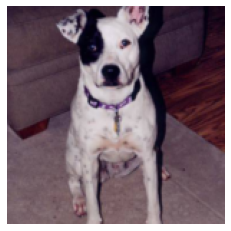

In [ ]:
transform = transforms.Compose([transforms.Resize(155),
                                transforms.CenterCrop(152),
                                transforms.ToTensor()])


train_dataset = datasets.ImageFolder(train, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, num_workers=8, shuffle=True)

images, labels = next(iter(train_dataloader))
helper.imshow(images[0], normalize=False)


In [ ]:
val_dataset = datasets.ImageFolder(val, transform=transform)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64, num_workers=8, shuffle=True)

test_dataset = datasets.ImageFolder(test, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, num_workers=8, shuffle=True)

Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

Our network is not very big, so we can implenet it manually:

In [ ]:
class SeqNet(torch.nn.Module):
    def __init__(self, image_size):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(
            in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.act1 = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.act2 = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = torch.nn.Conv2d(
            in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.act3 = torch.nn.ReLU()
        self.pool3 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = torch.nn.Linear(int(image_size/2/2/2)**2*64, 64)
        self.act4 = torch.nn.ReLU()
        self.drop1 = torch.nn.Dropout(p=0.5)

        self.fc2 = torch.nn.Linear(64, 1)
        self.act5 = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.act3(x)
        x = self.pool3(x)

        x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))

        x = self.fc1(x)
        x = self.act4(x)
        x = self.drop1(x)
        x = self.fc2(x)
        x = self.act5(x)

        return x
    
    def infer(self, x):
        x = self.forward(x)
        x = (x >= 0.5).long()
        return x

In [ ]:
seqnet = SeqNet(152)
seqnet.to('cuda')

SeqNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=23104, out_features=64, bias=True)
  (act4): ReLU()
  (drop1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (act5): Sigmoid()
)

In [ ]:

#functions for creation of saving directory
def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

#training function
def train_model(model, loss, optimizer, epoch_num, train_dataloader, val_dataloader, path, pr_step=1):
    loss_history = []
    accuracy_history = []

    ensure_dir(path+'/checkpoints/')

    for epoch in range(epoch_num):
        print(f"Epoch {epoch+1} of {epoch_num}.")
        #train part
        model.train()
        for data, labels in pb(train_dataloader):
            optimizer.zero_grad()

            data = data.to(device)
            labels = labels.to(device)
            preds = model.forward(data).squeeze()

            loss_value = loss(preds, labels.float())
            loss_value.backward()

            optimizer.step()
        
        torch.save(model.state_dict(), path+f"/checkpoints/epoch_{epoch+1}.pth")
        
        #val part
        model.eval()
        v_all_preds = []
        v_all_labels = []
        for v_data, v_labels in pb(val_dataloader):
                v_all_labels.append(v_labels)
                v_data = v_data.to(device)
                v_labels = v_labels.to(device)
                v_all_preds.append(model.forward(v_data).squeeze().data.cpu())
                
        v_all_preds = torch.cat(v_all_preds)
        v_all_labels = torch.cat(v_all_labels)
        loss_history.append(loss(v_all_preds, v_all_labels.float()))
        accuracy_history.append(((v_all_preds >= 0.5) == v_all_labels).float().mean())

        with open(path+'/loss_hist.txt', 'w') as f:
            for item in loss_history:
                f.write(f"{item}\n")
        with open(path+'/accur_hist.txt', 'w') as f:
            for item in accuracy_history:
                f.write(f"{item}\n")

        if epoch % pr_step == 0:
            print(f"Accuracy at epoch {epoch+1} = {accuracy_history[-1]}")
            print(f"Loss at epoch {epoch+1} = {loss_history[-1]}")

    return model, loss_history, accuracy_history

#inference function
def infer_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    for data, labels in pb(dataloader):
            all_labels.append(labels)
            data = data.to(device)
            labels = labels.to(device)
            all_preds.append(model.forward(data).squeeze().data.cpu())
            
    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    accuracy = ((all_preds >= 0.5) == all_labels).float().mean()

    return accuracy


In [ ]:
#Training of our model
model = seqnet
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
loss = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

model, loss_history, accuracy_history = train_model(model, loss, optimizer, train_dataloader, val_dataloader, '/content/drive/MyDrive/Algorithms/Report 4/Task 4/seqnet_152_1')

100% (313 of 313) |######################| Elapsed Time: 0:01:14 Time:  0:01:14
100% (39 of 39) |########################| Elapsed Time: 0:00:08 Time:  0:00:08


Accuracy at epoch 1 = 0.6759036183357239
Loss at epoch 1 = 0.5965367555618286


100% (313 of 313) |######################| Elapsed Time: 0:01:14 Time:  0:01:14
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 2 = 0.7028112411499023
Loss at epoch 2 = 0.5788105726242065


100% (313 of 313) |######################| Elapsed Time: 0:01:14 Time:  0:01:14
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 3 = 0.7566264867782593
Loss at epoch 3 = 0.499519407749176


100% (313 of 313) |######################| Elapsed Time: 0:01:14 Time:  0:01:14
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 4 = 0.7634538412094116
Loss at epoch 4 = 0.48648229241371155


100% (313 of 313) |######################| Elapsed Time: 0:01:15 Time:  0:01:15
100% (39 of 39) |########################| Elapsed Time: 0:00:08 Time:  0:00:08


Accuracy at epoch 5 = 0.7935742735862732
Loss at epoch 5 = 0.4615119695663452


100% (313 of 313) |######################| Elapsed Time: 0:01:14 Time:  0:01:14
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 6 = 0.8080321550369263
Loss at epoch 6 = 0.424926221370697


100% (313 of 313) |######################| Elapsed Time: 0:01:14 Time:  0:01:14
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 7 = 0.8080321550369263
Loss at epoch 7 = 0.4397054612636566


100% (313 of 313) |######################| Elapsed Time: 0:01:14 Time:  0:01:14
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 8 = 0.8204819560050964
Loss at epoch 8 = 0.4382869303226471


100% (313 of 313) |######################| Elapsed Time: 0:01:15 Time:  0:01:15
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 9 = 0.83253014087677
Loss at epoch 9 = 0.4340987503528595


100% (313 of 313) |######################| Elapsed Time: 0:01:15 Time:  0:01:15
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 10 = 0.8172690868377686
Loss at epoch 10 = 0.45117565989494324


100% (313 of 313) |######################| Elapsed Time: 0:01:14 Time:  0:01:14
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 11 = 0.8309236764907837
Loss at epoch 11 = 0.606669008731842


100% (313 of 313) |######################| Elapsed Time: 0:01:15 Time:  0:01:15
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 12 = 0.8289156556129456
Loss at epoch 12 = 0.48287534713745117


100% (313 of 313) |######################| Elapsed Time: 0:01:14 Time:  0:01:14
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 13 = 0.8240963816642761
Loss at epoch 13 = 0.5807269215583801


100% (313 of 313) |######################| Elapsed Time: 0:01:14 Time:  0:01:14
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 14 = 0.8124498128890991
Loss at epoch 14 = 0.5184107422828674


100% (313 of 313) |######################| Elapsed Time: 0:01:14 Time:  0:01:14
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 15 = 0.8257027864456177
Loss at epoch 15 = 0.6413741707801819


100% (313 of 313) |######################| Elapsed Time: 0:01:15 Time:  0:01:15
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 16 = 0.8240963816642761
Loss at epoch 16 = 0.7229762077331543


100% (313 of 313) |######################| Elapsed Time: 0:01:15 Time:  0:01:15
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 17 = 0.823293149471283
Loss at epoch 17 = 0.8876270651817322


100% (313 of 313) |######################| Elapsed Time: 0:01:15 Time:  0:01:15
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 18 = 0.811646580696106
Loss at epoch 18 = 1.0641719102859497


100% (313 of 313) |######################| Elapsed Time: 0:01:16 Time:  0:01:16
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 19 = 0.8144578337669373
Loss at epoch 19 = 0.9508486986160278


100% (313 of 313) |######################| Elapsed Time: 0:01:16 Time:  0:01:16
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 20 = 0.8261044025421143
Loss at epoch 20 = 1.0702663660049438


100% (313 of 313) |######################| Elapsed Time: 0:01:15 Time:  0:01:15
100% (39 of 39) |########################| Elapsed Time: 0:00:08 Time:  0:00:08


Accuracy at epoch 21 = 0.8236947655677795
Loss at epoch 21 = 0.9217901825904846


100% (313 of 313) |######################| Elapsed Time: 0:01:16 Time:  0:01:16
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 22 = 0.822088360786438
Loss at epoch 22 = 1.2486436367034912


100% (313 of 313) |######################| Elapsed Time: 0:01:16 Time:  0:01:16
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 23 = 0.8281124234199524
Loss at epoch 23 = 1.1213786602020264


100% (313 of 313) |######################| Elapsed Time: 0:01:15 Time:  0:01:15
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 24 = 0.8204819560050964
Loss at epoch 24 = 1.2962327003479004


100% (313 of 313) |######################| Elapsed Time: 0:01:15 Time:  0:01:15
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 25 = 0.8156626224517822
Loss at epoch 25 = 1.5403589010238647


100% (313 of 313) |######################| Elapsed Time: 0:01:16 Time:  0:01:16
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 26 = 0.8156626224517822
Loss at epoch 26 = 1.24151611328125


100% (313 of 313) |######################| Elapsed Time: 0:01:16 Time:  0:01:16
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 27 = 0.8248996138572693
Loss at epoch 27 = 1.9423798322677612


100% (313 of 313) |######################| Elapsed Time: 0:01:15 Time:  0:01:15
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 28 = 0.8224899768829346
Loss at epoch 28 = 1.4978758096694946


100% (313 of 313) |######################| Elapsed Time: 0:01:15 Time:  0:01:15
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 29 = 0.8208835124969482
Loss at epoch 29 = 1.338157296180725


100% (313 of 313) |######################| Elapsed Time: 0:01:15 Time:  0:01:15
100% (39 of 39) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy at epoch 30 = 0.8204819560050964
Loss at epoch 30 = 1.535719394683838




All our losses and accureces were saving during training. And now we can load these for futher research

In [ ]:
#import of training data
seqnet_loss = []
with open('/content/drive/MyDrive/Algorithms/Report 4/Task 4/seqnet_152_1/loss_hist.txt', 'r') as f:
    seqnet_loss = [float(x) for x in f.read().replace('\n', ' ').split()]

seqnet_acc = []
with open('/content/drive/MyDrive/Algorithms/Report 4/Task 4/seqnet_1accur_hist.txt', 'r') as f:
    seqnet_acc = [float(x) for x in f.read().replace('\n', ' ').split()]

In [ ]:
def show_results(loss, acc):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(loss)+1), loss)
    axs[0].set_title('Loss function')
    axs[0].set_xlabel('Number of epochs')
    axs[0].set_ylabel('Loss')


    axs[1].plot(range(1, len(acc)+1), acc)
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('Number of epochs')
    axs[1].set_ylabel('Accuracy')
    plt.show()

    min_loss = min(loss)
    epoch_number = loss.index(min_loss)+1
    print(f"Min. loss is reached at epoch №{epoch_number}")

    return epoch_number

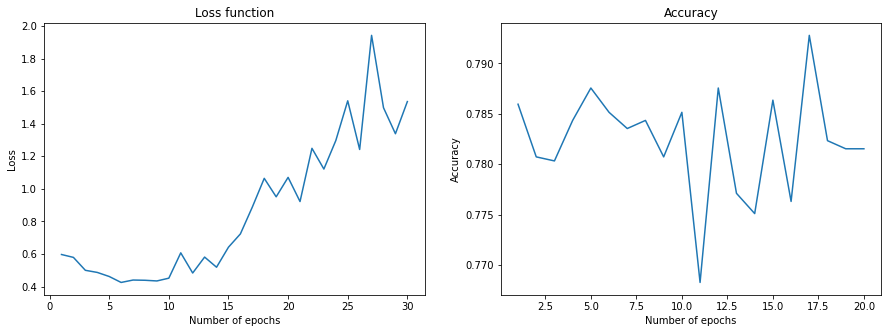

Min. loss is reached at epoch №6


In [ ]:
seqnet_epoch = show_results(seqnet_loss, seqnet_acc)

Minimum loss was reached at epoch 6. We can load this state and check our model on test data

In [ ]:
#import of model state with the best results
seqnet.load_state_dict(torch.load(f"/content/drive/MyDrive/Algorithms/Report 4/Task 4/seqnet_152_1/checkpoints/epoch_{seqnet_epoch}.pth"))

<All keys matched successfully>

Calculation of the accuracy at test data:

In [ ]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong
device='cuda'
scores = infer_model(seqnet, test_dataloader)
print("Accuracy on test data: %.2f%%" % (scores*100))

100% (40 of 40) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


Accuracy on test data: 82.52%


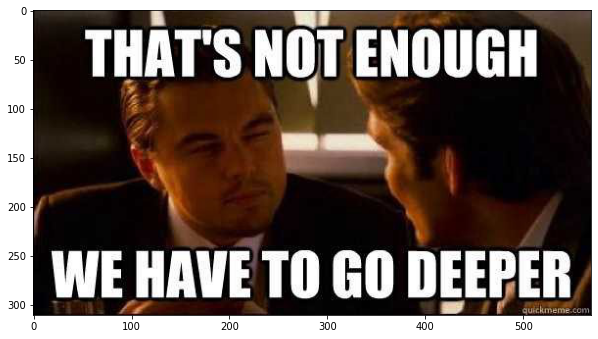

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('/content/drive/My Drive/Deeper.jpeg')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()


Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

## Data preporation for pretrained models

Models from torch library was pretrained on images with special preprocessing, so we need to do the same preprocessing with our images.

In [ ]:
transform = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


train_dataset = datasets.ImageFolder(train, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, num_workers=8, shuffle=True)

images, labels = next(iter(train_dataloader))

#helper.imshow(images[0], normalize=False)

val_dataset = datasets.ImageFolder(val, transform=transform)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64, num_workers=8, shuffle=True)

test_dataset = datasets.ImageFolder(test, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, num_workers=8, shuffle=True)

## VGG16

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [ ]:
vgg16 = models.vgg16(pretrained=True)

#we freeze convolutional layers to finetune only new fully connected layers
for param in vgg16.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [ ]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
vgg16.classifier = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=25088, out_features=256),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=256, out_features=1),
    nn.Sigmoid()
)


print(vgg16.classifier)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=25088, out_features=256, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=256, out_features=1, bias=True)
  (5): Sigmoid()
)


E.g., it was like:


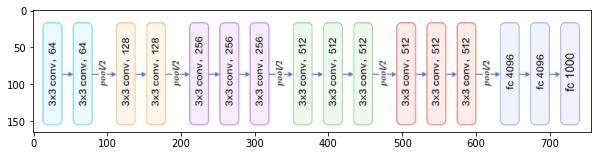

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

and it becomes:

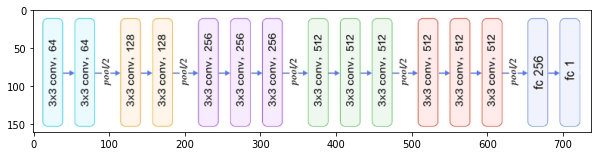

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [ ]:
#trainig
model = vgg16
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
loss = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
path = '/content/drive/MyDrive/Algorithms/Report 4/Task 4/vgg16_1'
model, loss_history, accuracy_history = train_model(model, loss, optimizer, 15, train_dataloader, val_dataloader, path)

Epoch 1 of 15.


100% (313 of 313) |######################| Elapsed Time: 0:01:52 Time:  0:01:52
100% (39 of 39) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


Accuracy at epoch 1 = 0.9855421781539917
Loss at epoch 1 = 0.047060783952474594
Epoch 2 of 15.


100% (313 of 313) |######################| Elapsed Time: 0:01:50 Time:  0:01:50
100% (39 of 39) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


Accuracy at epoch 2 = 0.9867469668388367
Loss at epoch 2 = 0.040950533002614975
Epoch 3 of 15.


100% (313 of 313) |######################| Elapsed Time: 0:01:50 Time:  0:01:50
100% (39 of 39) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


Accuracy at epoch 3 = 0.988353431224823
Loss at epoch 3 = 0.03871003910899162
Epoch 4 of 15.


100% (313 of 313) |######################| Elapsed Time: 0:01:50 Time:  0:01:50
100% (39 of 39) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


Accuracy at epoch 4 = 0.9871485829353333
Loss at epoch 4 = 0.039244819432497025
Epoch 5 of 15.


100% (313 of 313) |######################| Elapsed Time: 0:01:50 Time:  0:01:50
100% (39 of 39) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


Accuracy at epoch 5 = 0.9859437942504883
Loss at epoch 5 = 0.03868948668241501
Epoch 6 of 15.


100% (313 of 313) |######################| Elapsed Time: 0:01:50 Time:  0:01:50
100% (39 of 39) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


Accuracy at epoch 6 = 0.9863454103469849
Loss at epoch 6 = 0.0394638255238533
Epoch 7 of 15.


100% (313 of 313) |######################| Elapsed Time: 0:01:50 Time:  0:01:50
100% (39 of 39) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


Accuracy at epoch 7 = 0.9859437942504883
Loss at epoch 7 = 0.040173448622226715
Epoch 8 of 15.


100% (313 of 313) |######################| Elapsed Time: 0:01:50 Time:  0:01:50
100% (39 of 39) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


Accuracy at epoch 8 = 0.9871485829353333
Loss at epoch 8 = 0.04038449004292488
Epoch 9 of 15.


100% (313 of 313) |######################| Elapsed Time: 0:01:50 Time:  0:01:50
100% (39 of 39) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


Accuracy at epoch 9 = 0.9855421781539917
Loss at epoch 9 = 0.04142721742391586
Epoch 10 of 15.


100% (313 of 313) |######################| Elapsed Time: 0:01:50 Time:  0:01:50
100% (39 of 39) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


Accuracy at epoch 10 = 0.9859437942504883
Loss at epoch 10 = 0.042158231139183044
Epoch 11 of 15.


100% (313 of 313) |######################| Elapsed Time: 0:01:50 Time:  0:01:50
100% (39 of 39) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


Accuracy at epoch 11 = 0.9859437942504883
Loss at epoch 11 = 0.04378208518028259
Epoch 12 of 15.


100% (313 of 313) |######################| Elapsed Time: 0:01:50 Time:  0:01:50
100% (39 of 39) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


Accuracy at epoch 12 = 0.9851405620574951
Loss at epoch 12 = 0.07679225504398346
Epoch 13 of 15.


100% (313 of 313) |######################| Elapsed Time: 0:01:50 Time:  0:01:50
100% (39 of 39) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


Accuracy at epoch 13 = 0.984337329864502
Loss at epoch 13 = 0.07759074866771698
Epoch 14 of 15.


100% (313 of 313) |######################| Elapsed Time: 0:01:50 Time:  0:01:50
100% (39 of 39) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


Accuracy at epoch 14 = 0.9859437942504883
Loss at epoch 14 = 0.07866878062486649
Epoch 15 of 15.


100% (313 of 313) |######################| Elapsed Time: 0:01:51 Time:  0:01:51
100% (39 of 39) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


Accuracy at epoch 15 = 0.9851405620574951
Loss at epoch 15 = 0.08011019229888916


In [ ]:
#import of the results from saved files
vgg16_loss = []
with open('/content/drive/MyDrive/Algorithms/Report 4/Task 4/vgg16_1/loss_hist.txt', 'r') as f:
    vgg16_loss = [float(x) for x in f.read().replace('\n', ' ').split()]

vgg16_acc = []
with open('/content/drive/MyDrive/Algorithms/Report 4/Task 4/vgg16_1/accur_hist.txt', 'r') as f:
    vgg16_acc = [float(x) for x in f.read().replace('\n', ' ').split()]

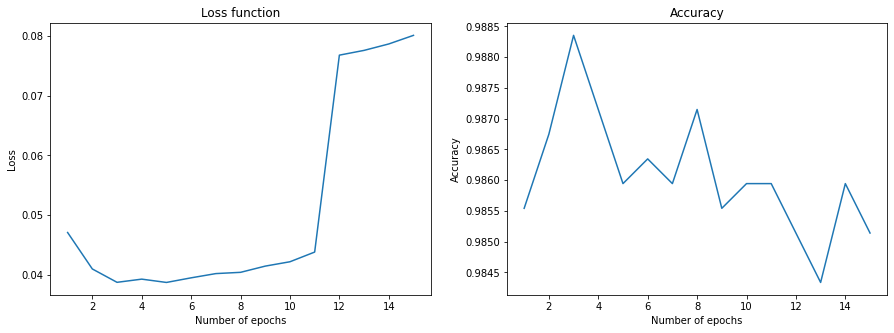

Min. loss is reached at epoch №5


In [ ]:
vgg16_epoch = show_results(vgg16_loss, vgg16_acc)

In [ ]:
#import of the best model state
vgg16.load_state_dict(torch.load(f"/content/drive/MyDrive/Algorithms/Report 4/Task 4/vgg16_1/checkpoints/epoch_{vgg16_epoch}.pth"))

<All keys matched successfully>

In [ ]:
#inference on the test data
vgg16.to('cuda')
scores = infer_model(vgg16, test_dataloader)
print("Accuracy on test data: %.2f%%" % (scores*100))

100% (40 of 40) |########################| Elapsed Time: 0:00:25 Time:  0:00:25


Accuracy on test data: 98.48%


## ResNen18

In [ ]:
resnet18 = models.resnet18(pretrained=True)

for param in resnet18.parameters():
    param.requires_grad = False

We chanege last fully connected layer of our model

In [ ]:
resnet18.fc = nn.Sequential(nn.Linear(512, 1),
                            nn.Sigmoid())
                          

In [ ]:
resnet18.fc

Sequential(
  (0): Linear(in_features=512, out_features=1, bias=True)
  (1): Sigmoid()
)

In [ ]:
#Training
model = resnet18
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
loss = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
path = '/content/drive/MyDrive/Algorithms/Report 4/Task 4/resnet18_1'
model, loss_history, accuracy_history = train_model(model, loss, optimizer, 15, train_dataloader, val_dataloader, path)

In [ ]:
#Import of the parameters
resnet18_loss = []
with open('/content/drive/MyDrive/Algorithms/Report 4/Task 4/resnet18_1/loss_hist.txt', 'r') as f:
    resnet18_loss = [float(x) for x in f.read().replace('\n', ' ').split()]

resnet18_acc = []
with open('/content/drive/MyDrive/Algorithms/Report 4/Task 4/resnet18_1accur_hist.txt', 'r') as f:
    resnet18_acc = [float(x) for x in f.read().replace('\n', ' ').split()]

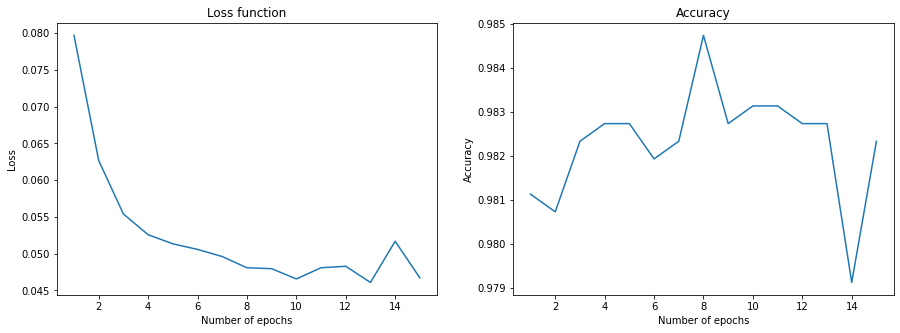

Min. loss is reached at epoch №13


In [ ]:
resnet18_epoch = show_results(resnet18_loss, resnet18_acc)

In [ ]:
#loading of the best model state
resnet18.load_state_dict(torch.load(f"/content/drive/MyDrive/Algorithms/Report 4/Task 4/resnet18_1/checkpoints/epoch_{resnet18_epoch}.pth"))

<All keys matched successfully>

In [ ]:
#Inference on the test dataset
resnet18.to('cuda')
scores = infer_model(resnet18, test_dataloader)
print("Accuracy on test data: %.2f%%" % (scores*100))

100% (40 of 40) |########################| Elapsed Time: 0:00:11 Time:  0:00:11


Accuracy on test data: 98.12%


## Predicition of the custom images

In [ ]:
def predict_label(model, path):
    transform = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


    dataset = datasets.ImageFolder(path, transform=transform)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, num_workers=8, shuffle=False)

    images, labels = next(iter(dataloader))
    description = ['cat', 'dog']
    model.to('cpu')
    model.eval()
    preds = (model.forward(images).data.squeeze() >= 0.5)

    for image, pred in zip(images, preds):
        imshow(image, normalize=True, title=description[pred])
        



Let's try to use vgg16 model for label prediction. How it can be seen, model identifies correctly photos 1, 3, 4, but in difficult case (photo 2) the model makes a mistake.

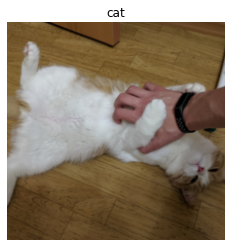

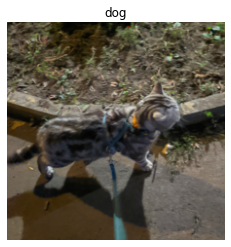

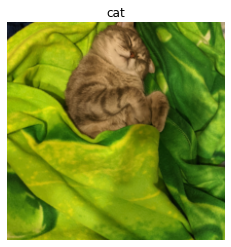

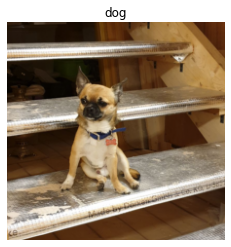

In [ ]:
predict_label(vgg16, '/content/drive/MyDrive/Algorithms/Report 4/Task 4/My_photo')